In [49]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

#Loading da
data=loadmat("F:/NumberRecognitionBigger.mat")

#converting data into dataframe
df=pd.DataFrame(data.items(),dtype=float)
data_3d=[]
data_2d=[]
predict=[]

for index, item in df.iterrows():
    if(index>2):
         data_3d.append(np.array(df.iloc[index,1]))

#converting list into dataframe      
df=pd.DataFrame(data_3d)

#reshaping 3d into 2d data
for index , item in df.iterrows():
    data_3d = np.array(item[0],dtype=float)
    arr = data_3d.reshape(-1, data_3d.shape[-1])
    data_2d.append(arr)


C:\Users\user\Anaconda4\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\user\Anaconda4\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [50]:
# fetching features and labels
X=data_2d[0]
Y=data_2d[1]

In [51]:
X=X.transpose()
Y=Y.transpose()

In [52]:
data=np.append(X, Y, axis=1)
data=pd.DataFrame(data)
data=data.rename(columns={784:"y_label"})
data=data.sort_values("y_label")

In [53]:
data_eight=data.loc[data['y_label'] == 8]
data_nine=data.loc[data['y_label']==9]
data=np.append(data_eight, data_nine, axis=0)


In [54]:
data=pd.DataFrame(data)

# fetching features and labels
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
X=np.array(X)
Y=np.array(Y)

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2)

In [56]:
x_train, x_test, y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([9., 9., 8., ..., 8., 8., 8.]),
 array([8., 9., 9., ..., 9., 8., 9.]))

In [57]:
testing_error=[]
testing_error=[]
accuracy=[]
accuracy=[]


print("-----------------------KNN Classification--------------------------")
for k in range(1, 20, 1):
    model = KNeighborsClassifier(n_neighbors=k) 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    testing_error.append(np.mean(y_pred!=y_test))
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

print(testing_error)

-----------------------KNN Classification--------------------------
[0.010221465076660987, 0.00596252129471891, 0.009369676320272573, 0.009369676320272573, 0.01192504258943782, 0.011073253833049404, 0.012776831345826235, 0.010221465076660987, 0.012776831345826235, 0.013628620102214651, 0.016183986371379896, 0.017035775127768313, 0.020442930153321975, 0.02129471890971039, 0.022998296422487224, 0.020442930153321975, 0.022998296422487224, 0.022146507666098807, 0.022146507666098807]


In [19]:
for k in range(1, 20, 1):
    model = KNeighborsClassifier(n_neighbors=k) 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    testing_error.append(np.mean(y_pred!=y_test))
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    
print(testing_error)

[0.008517887563884156, 0.00596252129471891, 0.011073253833049404, 0.010221465076660987, 0.012776831345826235, 0.013628620102214651, 0.014480408858603067, 0.012776831345826235, 0.012776831345826235, 0.01192504258943782, 0.013628620102214651, 0.013628620102214651, 0.014480408858603067, 0.016183986371379896, 0.017035775127768313, 0.017035775127768313, 0.019591141396933562, 0.019591141396933562, 0.019591141396933562, 0.008517887563884156, 0.00596252129471891, 0.011073253833049404, 0.010221465076660987, 0.012776831345826235, 0.013628620102214651, 0.014480408858603067, 0.012776831345826235, 0.012776831345826235, 0.01192504258943782, 0.013628620102214651, 0.013628620102214651, 0.014480408858603067, 0.016183986371379896, 0.017035775127768313, 0.017035775127768313, 0.019591141396933562, 0.019591141396933562, 0.019591141396933562]


<function print>

In [58]:
print(accuracy)

[0.989778534923339, 0.9940374787052811, 0.9906303236797275, 0.9906303236797275, 0.9880749574105622, 0.9889267461669506, 0.9872231686541738, 0.989778534923339, 0.9872231686541738, 0.9863713798977853, 0.9838160136286201, 0.9829642248722317, 0.979557069846678, 0.9787052810902896, 0.9770017035775128, 0.979557069846678, 0.9770017035775128, 0.9778534923339012, 0.9778534923339012]


----------plotting testing error-----------------------


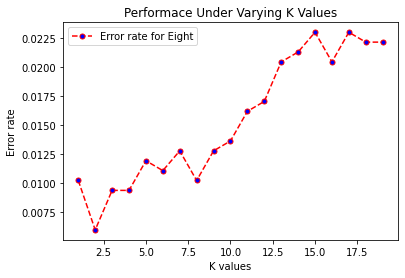

In [64]:
print("----------plotting testing error-----------------------")
#plt.figure(figsize=(10,10))
plt.plot(range(1,20, 1), testing_error,color='red', label='Error rate', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('K values')
plt.ylabel('Error rate')
plt.title('Performace Under Varying K Values')    
plt.legend()
plt.show()

----------plotting testing accuracy-----------------------


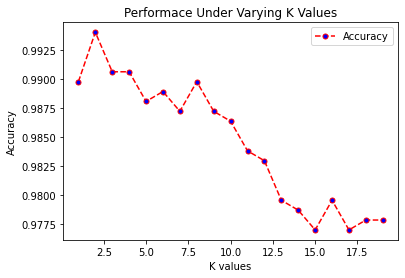

In [67]:
print("----------plotting testing accuracy-----------------------")
#plt.figure(figsize=(10,10))
plt.plot(range(1,20, 1), accuracy,color='red', label='Accuracy', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.title('Performace Under Varying K Values')    
plt.legend()
plt.show()